#Medidas Internas de evaluación

##Purity

Implementa tu propia versióón de Purity. Tu funcióón deberáá recibir de entrada: 

* Dos listas del mismo tamaño;
* La primera con la clase de las instancias
* La segunda con el agrupamiento que se desea evaluar


Le vamos a llamar clases a los grupos "verdaderos" y los denotare 
por **C**

purity(Ω, C) = $1/n$ * SUM de K max |Wk n Cj|

K es el núúmero de clusters
n es mi número total de elementos

In [ ]:
def organization(C, omega):
  """
  C = lista de n elementos
  omega = lista de n elementos
  """
  # Organizamos C para formar los clusters
  label = 0; organization_C = []
  for element in C:
    my_element = (element, label) 
    organization_C.append(my_element)
    label += 1

  label = 0; organization_O = [] 
  for element in omega: 
    my_element = (element, label)
    organization_O.append(my_element)
    label += 1

  return (organization_C, organization_O)

#Implementación de **Purity**

In [ ]:
def purity(C, omega):
  """
  C = lista de n elementos, instancias 
  omega = lista de n elementosm, agrupamiento
  """
  
  #C agrupamiento correcto 
  #omega agrupamiento a comparar
  N = len(C) #Para hacer 1/n cuando aplique la formula
  C_elements = set(C); Omega_elements = set(omega) # Para hacer los formatos de clusters
  
  # Comprobamos que las listas sean del mismo tamaño
  if len(C) == len(omega): pass
  else: return("Se espera listas de tamaño similar")

  C, omega = organization(C, omega) #asignamos un indice a cada elemento 

  # Formamos las etiquetas para los clusters
  clusters_C = {key: [] for key in C_elements}; clusters_O = {key: [] for key in Omega_elements}
  #print(clusters_C); print(clusters_O)
  
  #formamos los clusters
  # clusters C
  for element, label in C:
    clusters_C[element].append(label)
  # clusters O
  for element, label in omega:
    clusters_O[element].append(label)

  #print(clusters_C); print(clusters_O)
  #purity(Ω, C) = 1/n * SUM de K max |Wk n Cj|
  
  key_o = clusters_O.keys(); key_c = clusters_C.keys()
  tmp_summation = 0
  # Hacemos la comparacióón de todos contra todos
  for subCluster_o in key_o:
    my_cluster_o = set(clusters_O[subCluster_o])
    tmp_value_comparation = []
    for subCluster_c in key_c:
      my_cluster_c = set(clusters_C[subCluster_c])
      equal_elements = len(list(my_cluster_o & my_cluster_c)) #comparamos los clusters
      tmp_value_comparation.append(equal_elements)

    tmp_summation += max(tmp_value_comparation)

  # Aplicamos la formula para obtener la pureza
  result = (1/N)*tmp_summation    
  #print(clusters_C); print(clusters_O)
  return(result*100)
  #print(C,"\n",omega)

In [ ]:
C = [0, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1]
#omega = [0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2]
omega = ['C', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'C', 'C', 'C', 'B', 'A', 'A', 'C']
print("Pureza: {0}%".format(purity(C, omega)))

Pureza: 50.0%


In [ ]:
def combinations(elements, r):
  """
  elements = una lista de números o letras para combinar
  r = el número del que se desea hacer la combinación
  """
  combinations = []
  n = len(elements)
  for i in range(n-1):
    for j in range(i+1, n):
      combinations.append((elements[i], elements[j]))

  #print(combinations)
  return (combinations)


#Implementación de **Rand Index**

In [ ]:
def rand_index(C, omega):
  """
  C = lista de n elementos, instancias 
  omega = lista de n elementosm, agrupamiento
  """
  #C agrupamiento correcto 
  #omega agrupamiento a comparar
  N = len(C) #Para hacer N(N-1)/2 cuando aplique la formula
  C_elements = set(C); Omega_elements = set(omega) # Para hacer los formatos de clusters
  
  # Comprobamos que las listas sean del mismo tamaño
  if len(C) == len(omega): pass
  else: return("Se espera listas de tamaño similar")

  C, omega = organization(C, omega) #asignamos un indice a cada elemento 
  #print(C)
  # Formamos las etiquetas para los clusters
  clusters_C = {key: [] for key in C_elements}; clusters_O = {key: [] for key in Omega_elements}
  #formamos los clusters
  # clusters C
  for element, label in C:
    clusters_C[element].append(label)
  # clusters O
  for element, label in omega:
    clusters_O[element].append(label)


  #Si deseas ver los clusters que se formaron, descomentas las dos líneas siguientes
  #print("cluterC:", clusters_C)
  #print("cluterO:", clusters_O)

  #RI = TP+TN/TP+FP+FN+TN
  #TP si eran parejas de la misma clase y quedaron juntas, acierto 
  #TN si eran parejas de clase distinta y quedaron en diferente grupo, acierto
  #Recordemos que TP+FP+FN+TN = N(N-1)/2 O sea, el total de posibles parejas 
  #Para obtener TP+TN basta con hacer #elementosEnCluster en 2 es decir
  #sacar todas las posibles parejas de cada cluster, el total seráá TP+TN
  """
  TP
  """
  #Procedimiento para obtener TP
  #TP_list = []
  TP = 0
  for subClusterO in clusters_O.values():
    #print(subClusterO)
    combinationsO = combinations(subClusterO, 2)
    #print(combinationsO)
    for subClusterC in clusters_C.values():
      combinationsC = combinations(subClusterC, 2)
      intersection_OC = list(set(combinationsO) & set(combinationsC))
      if len(intersection_OC) != 0:
        TP += len(intersection_OC)
        #print(intersection_OC) #Si deseas ver todas las tuplas TP descomenta esta líínea

  #print("TP son todas las tuplas anteriores...")
  print("TP:",TP)

  """
  TN
  """
  #Procedimiento para obtener TN
  pairs = [x for x in range(N)] #Para obtener todas las posibles parejas
  #print("pairs", pairs)
  my_pairs = combinations(pairs,2) #Hacemos una lista con todas las posibles combinaciones 
  #de nuestra lista C

  #print(my_pairs)
  #Generamos un diccionario para Omega y uno para C
  #donde las claves son las parejas de todas las combinaciones posibles
  omega_count = {key: 0 for key in my_pairs}; C_count = {key: 0 for key in my_pairs}
  #Ahora recorremos cada subcluster y sacamos todas sus posibles parejas
  #y a cada pareja que se encuentre en todas las combinaciones posibles les pones 1
  #las que queden en cero, significa que son parejas que no existen en nuestros subcluster 
  #es decir, ¡estan separadas! En nuestro subcluster o se trata de un subcluster con un solo elemento. 
  #Para omega
  for element in clusters_O.values():
    if len(element) == 1: 
      omega_count[element[0]] = 0
    else: 
      combination_element = combinations(element, 2)
      for actual_combination in combination_element:
        if actual_combination in omega_count:
          omega_count[actual_combination] += 1

  #Hacemos lo mismo para cada subcluster de C
  #para C
  for element in clusters_C.values():
    if len(element) == 1: 
      C_count[element[0]] = 0
    else: 
      combination_element = combinations(element, 2)
      for actual_combination in combination_element:
        if actual_combination in C_count:
          C_count[actual_combination] += 1


  #print("omega,",omega_count)
  #print("C,",C_count)
  #Ahora que ya tenemos un diccionario que nos dice las parejas que hay en omega y uno que nos dice 
  #las parejas que hay en C
  #Obtenes las parejas que tengan como valor cero tanto en omega como en C
  #o sea, que estan separados tanto en omega como en C
  TN = 0
  for key_O, value_O in omega_count.items():
    if value_O == 0: 
      for key_C, value_C in C_count.items():
        if value_C == 0 and key_C == key_O:
          #print(key_C) #Si deseas ver las tuplas TN descomenta esta líínea 
          TN += 1
  
  #print("TN son todas las tuplas anteriores...")
  print("TN:",TN)
  #RI = TP+TN/TP+FP+FN+TN = TP+TN/((N*(N-1)/2))
  numerador = TP+TN; denominador = (N*(N-1))/2
  result = (numerador/denominador)
  return (result*100)

In [ ]:
C = [0, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1]
#omega = [0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2]
omega = ['C', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'C', 'C', 'C', 'B', 'A', 'A', 'C']

#C = [0,2,0,2,1,2,1]
#omega = ["C", "B", "A", "B", "B", "B", "B"]

#C = [0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0]
#omega = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

#C = [0,0,0,1,1,2,2,2]
#omega = [1,1,1,1,1,0,0,2]
print("Indice rand: {0}%".format(rand_index(C, omega)))

TP: 20
TN: 84
Indice rand: 54.736842105263165%


In [ ]:
def entropy(element, N):
    import math
    """
    element = lista de listas
    N = longitud de la lista antes de hacer clusters
    """
    summation = 0
    for subCluster in element.values():
        P1 = len(subCluster)/N
        if P1 <= 0:
            P2log = math.log2(1)
        else:
            P2log = math.log(P1)
        
        #print(P2log)
        summation += P1*P2log
        
    return(summation*-1)

In [ ]:
# Información mutua
def MI(C, omega):
  """
  C = lista de n elementos, instancias 
  omega = lista de n elementosm, agrupamiento
  """
  
  #C agrupamiento correcto 
  #omega agrupamiento a comparar
  N = len(C) #Para hacer 1/n cuando aplique la formula
  C_elements = set(C); Omega_elements = set(omega) # Para hacer los formatos de clusters
  
  # Comprobamos que las listas sean del mismo tamaño
  if len(C) == len(omega): pass
  else: return("Se espera listas de tamaño similar")

  C, omega = organization(C, omega) #asignamos un indice a cada elemento 

  # Formamos las etiquetas para los clusters
  clusters_C = {key: [] for key in C_elements}; clusters_O = {key: [] for key in Omega_elements}
  #print(clusters_C); print(clusters_O)
  
  #formamos los clusters
  # clusters C
  for element, label in C:
    clusters_C[element].append(label)
  # clusters O
  for element, label in omega:
    clusters_O[element].append(label)

  #print(clusters_C); print(clusters_O)
  #MI(Ω, C) = I(Ω, C)/[H(Ω)+ H(C)]/2
  #I(Ω, C) = SUM k SUM jP((ΩnC))*log(P(ΩknCj))/P((Ωk)*P(Cj))
  
  key_o = clusters_O.keys(); key_c = clusters_C.keys()

  
  summation_k = 0
  
  import math
  #import sys
  #limit = math.log(sys.float_info.min)
  # Hacemos la comparacióón de todos contra todos
  for subCluster_o in key_o:
    my_cluster_o = set(clusters_O[subCluster_o])
    #print(my_cluster_o)
    summation_j = 0
    for subCluster_c in key_c:    
      my_cluster_c = set(clusters_C[subCluster_c])
      #print(my_cluster_c)
      
    
      P = abs(len(list(my_cluster_o & my_cluster_c)))/N # P((ΩnC))
      tmp_p2 = (len(list(my_cluster_o))/N) * (len(list(my_cluster_c))/N)
      to_log = P/tmp_p2  
      #print(tmp/tmp2)
      if to_log <= 0:
        tmp3 = math.log2(1)
      else: 
        tmp3 = math.log2(to_log)
      
      tmp_result = P*tmp3
      #print(tmp_result)  
      summation_j += tmp_result
    
    summation_k += summation_j
      

  numerador = summation_k
  #print(clusters_O)
  denominador = (entropy(clusters_O, N)+entropy(clusters_C, N))/2
  #print(numerador)
  #print(denominador)
  result = numerador/denominador    
  #print(clusters_C); print(clusters_O)
  return(result)

In [ ]:
#C = [0, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1]
#omega = [0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2]
#omega = ['C', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'C', 'C', 'C', 'B', 'A', 'A', 'C']

C = [0,0,0,0]
omega = [0,1,2,3]
#C = [0, 0, 1, 1]
#omega = [1, 1, 0, 0]
#C = [1,1,0,0]
#omega = [0,0,1,1]
print("MI: {0}".format(MI(C, omega)))

MI: 0.0


#Evaluación de los agrupamiento mostrados en la figura 1 con los algoritmos implementados.

In [ ]:
#Rosa = 0
#Verde = 1
#Naranja = 2

"""
Tenemos tres grupos: 
Grupo_1 = [R, R, R, R, V, N]
Grupo_2 = [V, V, V, N, N]
Grupo_3 = [R, R, N, N, N, N, N]

Asignando un número a cada letra comenzando por 0 tenemos: 
Rosa = 0
Verde = 1
Naranja = 2
por lo que los grupos anteriores los podemos reescribir como:
Grupo_1 = [0,0,0,0,1,2]
Grupo_2 = [1,1,1,2,2]
Grupo_3 = [0,0,2,2,2,2,2]

Agrupando tenemos que omega es igual a:
omega = [Grupo_1, Grupo_2, Grupo_3] = ["R","R","R","R","V","N","V","V","V","N","N","R","R","N","N","N","N","N"]
ojo: solo estoy incluyendo los elementos, los clusters se formaran en el algoritmo
En el caso de C, C es nuestro mundo real donde los datos estan perfectamente acomodados: 
C = ["R","R","R","R","R","R","N","N","N","N","N","N","N","N","V","V","V","V"]
"""
#C = [0,0,0,0,0,0,2,2,2,2,2,2,2,2,1,1,1,1]
C = ["R","R","R","R","R","R","N","N","N","N","N","N","N","N","V","V","V","V"]
omega = ["R","R","R","R","V","N","V","V","V","N","N","R","R","N","N","N","N","N"]
#omega = [0,0,0,0,1,2,1,1,1,2,2,0,0,2,2,2,2,2]
print("Purity: {0}%".format(purity(C, omega)))
print("Indice rand: {0}%".format(rand_index(C, omega)))

Purity: 61.11111111111111%
cluterC: {'V': [14, 15, 16, 17], 'R': [0, 1, 2, 3, 4, 5], 'N': [6, 7, 8, 9, 10, 11, 12, 13]}
cluterO: {'V': [4, 6, 7, 8], 'R': [0, 1, 2, 3, 11, 12], 'N': [5, 9, 10, 13, 14, 15, 16, 17]}
TP: 19
TN: 74
Indice rand: 60.78431372549019%


Ahora supón que cada objeto (en todos los grupos) se duplica (cada bolita se parte en dos, del mismo color en el mismo grupo).

In [ ]:
#C = [0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1]
C = ["R","R","R","R","R","R","R","R","R","R","R","R","N","N","N","N","N","N","N","N","N","N","N","N","N","N","N","N","V","V","V","V","V","V","V","V"]
omega = ["R","R","R","R","R","R","R","R","V","V","N","N", "V","V","V","V","V","V","N","N","N","N", "R","R","R","R","N","N","N","N","N","N","N","N","N","N"]
#omega = [0,0,0,0,0,0,0,0,1,1,2,2, 1,1,1,1,1,1,2,2,2,2, 0,0,0,0,2,2,2,2,2,2,2,2,2,2]
print("Purity: {0}%".format(purity(C, omega)))
print("Indice rand: {0}%".format(rand_index(C, omega)))

Purity: 61.11111111111111%
cluterC: {'V': [28, 29, 30, 31, 32, 33, 34, 35], 'R': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'N': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]}
cluterO: {'V': [8, 9, 12, 13, 14, 15, 16, 17], 'R': [0, 1, 2, 3, 4, 5, 6, 7, 22, 23, 24, 25], 'N': [10, 11, 18, 19, 20, 21, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]}
TP: 94
TN: 296
Indice rand: 61.904761904761905%


* ¿Qué medidas cambian más (o menos) cuando se duplica el número de puntos?
R- El indice de rand cambia respecto al valor de TP y TN, aumenta casi 
cinco veces pero el resultado, el valor RI varia únicamente por unos cuantos decimales. 
* ¿Qué medida te parece mejor viendo este comportamiento? 
R- Purity
* ¿Por qué?
R- Porque desde mi punto de vista, el duplicar cada elementos, no deberíía de cambiar en nada, es decir. Sólo cambio la longitud del arreglo pero se deberíía de respetar el parecido entre ambos arreglos ya que en ambos se duplico. Entonces el hecho de que Purity no vario me da más confianza que RI, pues RI no sé que tanto va a variar entre mayor sea la longitud de los arreglos. 

#Exploración de datos

In [ ]:
import pandas as pd
clients = pd.read_csv('perfilClientes.csv')
clients.shape
#En el documento csv cada fila corresponde a un cliente, cada columna corresponde
#a una de las 62 preguntas

(249, 62)

In [ ]:
clients.columns = ["pregunta_{0}".format(x+1) for x in range (clients.shape[1])]
clients.index = ["cliente_{0}".format(x+1) for x in range (clients.shape[0])]

In [ ]:
clients.head(2)

,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,...,pregunta_53,pregunta_54,pregunta_55,pregunta_56,pregunta_57,pregunta_58,pregunta_59,pregunta_60,pregunta_61,pregunta_62
cliente_1,7,7,7,5,4,4,5,4,5,5,...,1,1,1,1,5,4,3,5,4,5
cliente_2,5,4,6,5,7,5,3,5,4,5,...,3,5,6,3,4,4,5,3,4,4


En el cuestionario se utilizo una escala de 7 puntos:
* 1 = completamente en desacuerdo
* 4 = ni de acuerdo ni en desacuerdo 
* 7 = completamente de acuerdo

Utiliza el método del codo para establecer un rango [k min , k max ] de posibles valores de k para realizar un agrupamiento. 
 Justifica tu respuesta para el rango propuesto.

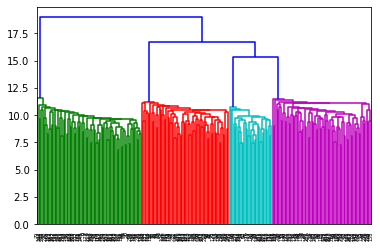

In [ ]:
import scipy.cluster.hierarchy as sch 
import matplotlib.pyplot as plt
Cluster = sch.linkage(clients, method='average', metric='euclidean')
sch.dendrogram(Cluster)
plt.show()

Para realizar la elección de los clusters minimos (Kmin), me base en lo visual representado por el dendograma. 
En el que se puede observar cuatro grupos de colores. Si bien puede que no sea exacto, es una buena aproximación. 
Leyendo algunos blogs similares a: https://machinelearningparatodos.com/segmentacion-utilizando-k-means-en-python/
https://www.loginradius.com/engineering/blog/Optimal-Clusters-KMeans/
https://www.reddit.com/r/learnmachinelearning/comments/jaarou/optimal_clusters_for_kmeans_algorithm/
obtienen una k de 4, pero es subjetivo. 
Para la elección de los clusters máximos (Kmax) decidí poner un tope no muy alto debido a que la inercia va decreciendo tal como se observa en la gráfica. 

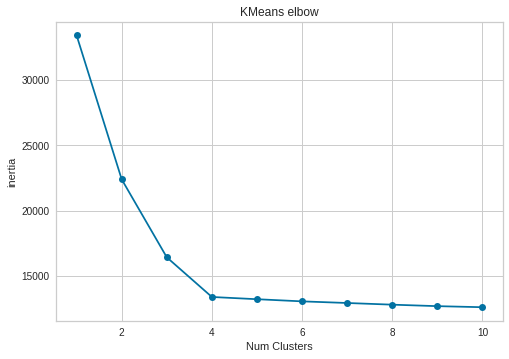

In [ ]:
from sklearn.cluster import KMeans
y_axis = []; x_axis = []
minn = 1
maxx = 10
while minn <= maxx:
    x_axis.append(minn)
    result = KMeans(n_clusters=minn).fit(clients)
    y_axis.append(result.inertia_)
    minn += 1
    
plt.plot(x_axis, y_axis, "o-")
plt.xlabel('Num Clusters')
plt.ylabel('inertia')
plt.title('KMeans elbow')
plt.show()

Utiliza el ı́ndice Silhouette para examinar tus datos con cada uno de los valores
de k en el rango propuesto en el inciso anterior. Analiza
los resultados y elige un valor de k, justificando tu decisión.

/home/ladiv/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


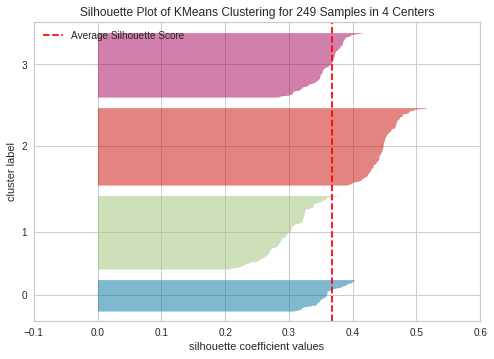

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(clients)
visualizer.show()      

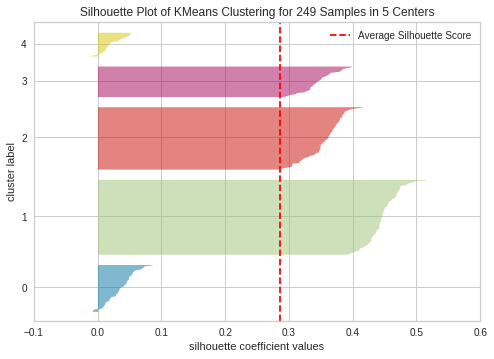

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(clients)
visualizer.show()      

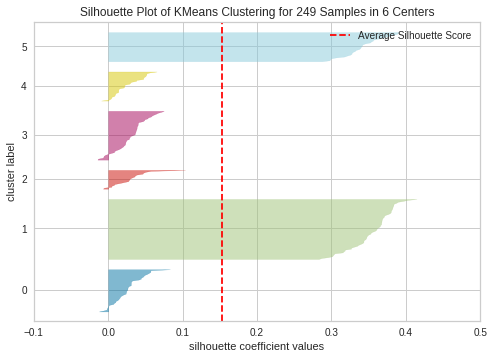

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(6)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(clients)
visualizer.show()      

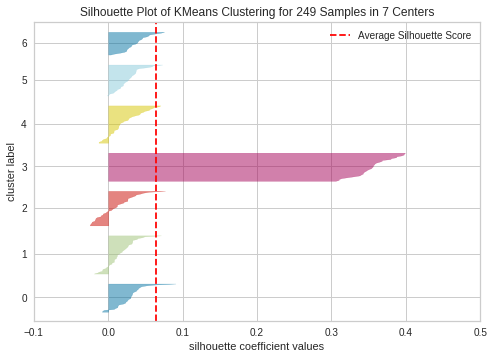

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(clients)
visualizer.show()      

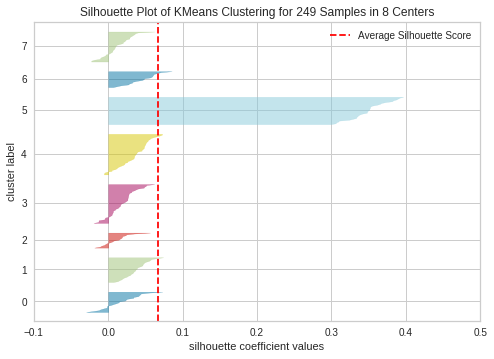

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(8)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(clients)
visualizer.show()      

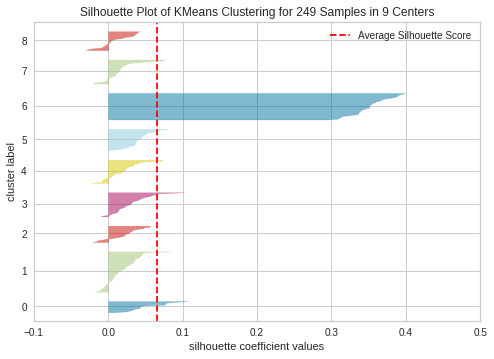

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(9)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(clients)
visualizer.show()      

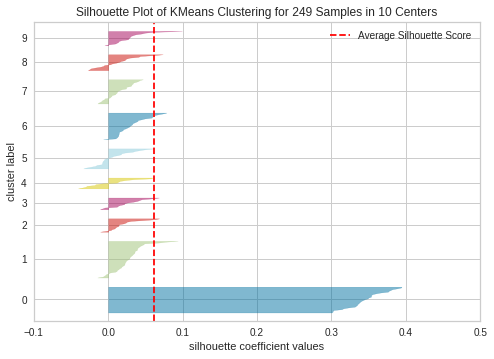

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(clients)
visualizer.show()      

Tomamos K=4 dado que máximiza considerablemente la distincióon entre grupos, observemos en las gráficas que a partir de k=5 
empezamos a tener valores negativos, es decir, el algoritmo aunque "distinguio" el grupo no esta del todo seguro respecto a la decisión. Hemos de tomar k=4 entonces

* Con el valor de k seleccionado, realiza el agrupamiento de los datos usando
  KMeans. 

* Utiliza los centroides para caracterizar cada grupo en términos
  de su interpretación en el contexto de los datos.
  
(por ejemplo, ¿el grupo 1 serı́a
de gente conservadora? ¿de gente arriesgada? ¿cómo interpretamos cada grupo
de acuerdo a su centroide y al significado de cada número?)

In [ ]:
result = KMeans(n_clusters=4,init='random',max_iter=200).fit(clients)
result

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=200, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
result.labels_

array([2, 0, 3, 0, 2, 2, 2, 1, 3, 2, 0, 1, 3, 2, 3, 2, 3, 2, 1, 0, 0, 2,
       0, 0, 1, 0, 3, 3, 3, 0, 2, 3, 3, 0, 0, 0, 0, 2, 3, 2, 3, 0, 3, 0,
       0, 3, 3, 0, 3, 3, 1, 0, 0, 1, 1, 3, 0, 2, 0, 3, 3, 2, 3, 1, 0, 2,
       2, 3, 2, 2, 3, 1, 0, 2, 3, 3, 0, 3, 3, 2, 0, 2, 2, 0, 2, 3, 2, 1,
       0, 3, 1, 0, 3, 0, 2, 3, 3, 2, 1, 0, 0, 0, 2, 1, 2, 3, 0, 2, 2, 0,
       1, 3, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 0, 1, 0, 3, 2, 3, 0, 0, 1, 2,
       1, 3, 2, 0, 3, 0, 3, 3, 2, 3, 3, 1, 0, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       1, 2, 2, 3, 3, 3, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 3,
       3, 0, 0, 1, 3, 0, 1, 0, 2, 0, 0, 3, 3, 0, 0, 2, 2, 0, 0, 1, 3, 3,
       3, 0, 3, 0, 1, 3, 0, 3, 3, 1, 2, 3, 2, 1, 3, 3, 0, 2, 3, 3, 2, 0,
       2, 0, 2, 2, 2, 2, 1, 3, 3, 3, 3, 1, 3, 0, 3, 3, 2, 2, 1, 3, 2, 0,
       3, 2, 2, 0, 1, 0, 2], dtype=int32)

In [ ]:
cluster_result = list(result.labels_)
#len(aux) >> 249 que es igual al número de registros que tengo 
# Una vez obtenidos los clusters, añadimos una nueva columna a nuestro dataframe para identificar a que cluster
# pertenece cada registro
clients = clients.assign(Cluster_group = cluster_result)
clients.head()

,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,...,pregunta_54,pregunta_55,pregunta_56,pregunta_57,pregunta_58,pregunta_59,pregunta_60,pregunta_61,pregunta_62,Cluster_group
cliente_1,7,7,7,5,4,4,5,4,5,5,...,1,1,1,5,4,3,5,4,5,2
cliente_2,5,4,6,5,7,5,3,5,4,5,...,5,6,3,4,4,5,3,4,4,0
cliente_3,4,2,5,4,2,4,5,4,3,4,...,5,4,4,4,2,5,5,5,3,3
cliente_4,5,5,7,6,7,3,4,5,4,2,...,4,5,5,4,5,4,3,4,5,0
cliente_5,6,6,4,4,5,3,5,2,5,3,...,2,1,2,5,4,4,4,4,4,2


In [ ]:
result.cluster_centers_.shape
#(k, n)
#k = Grupos
#n = columnas del dataset
#result.cluster_centers_

(4, 62)

In [ ]:
import numpy as np
clusters = result.cluster_centers_
# Redondeamos los valores para un mejor manejo y entendimiento de los números 
for x in range(len(clusters)):
    clusters[x] = np.around(clusters[x])

clusters

array([[4., 4., 6., 6., 6., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        2., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 6., 6.,
        6., 6., 6., 6., 6., 6., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [6., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4., 4., 4., 6., 7., 4.,
        6., 4., 4., 4., 6., 7., 4., 4., 2., 1., 4., 2., 4., 4., 7., 4.,
        4., 4., 4., 4., 7., 4., 4., 4., 1., 1., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 6., 6., 4., 4., 4., 6., 7., 6., 1., 1., 2.],
       [7., 7., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4.,
        4., 4., 4., 2., 4., 4., 6., 1., 4., 4., 4., 4., 4., 4., 2., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 7., 4., 4., 7., 6., 7., 7., 7.,
        6., 6., 2., 1., 2., 1., 1., 1., 4., 4., 4., 4., 4., 4.],
       [4., 2., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4., 4., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4.,
        4., 4

In [ ]:
#Grupo 1
clusters[0].mean()

4.129032258064516

In [ ]:
#Grupo 2
clusters[1].mean()

4.129032258064516

In [ ]:
#Grupo 3
clusters[2].mean()

4.064516129032258

In [ ]:
#Grupo 4
clusters[3].mean()

3.967741935483871

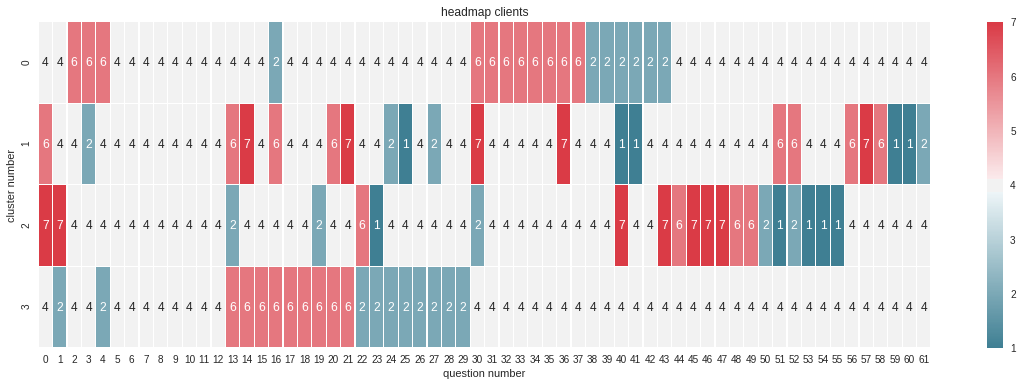

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 6))
sns.heatmap(clusters, linewidths = 0.2,
            cmap = sns.diverging_palette(220, 10, as_cmap=True),
            vmin = 1, vmax = 7, annot = True)

plt.xlabel('question number')
plt.ylabel('cluster number')
plt.title('headmap clients')
plt.show()

A partir de los resultados obtenidos en el mapa de calor nos podemos dar cuenta que tanto el grupo 3 y el grupo 0 esta compuesto por personas con poca elección. Es decir recordemos que en las preguntas el 4 significa "ni en acuerdo ni en desacuerdo". 
Por lo tanto con un buen microtargeting  podemos atraerlos a una lado conservador o a un lado arriesgado. Por otro lado 
en el grupo 1 y 2 tenemos grupos que si bien también estan en su mayoria en 4 están un poco más definidos por lo que es necesario ver un poco el cuestionario para ver en que preguntas están muy decididos.
En el grupo 1: 
    Quiero un auto que este a la moda
    No tengo tiempo para preocuparme por el mantenimiento
    Me encanta manejar
    El carro que compre debe ser capaz de aguantar largos viajes
    Quiero un vehiculo que sea ecoamigable
    Uno no deberia gastar más de lo que tiene
    Si el carro es aerodinamico seguro ahorra gasolina
    Tener un carro masculino es importante para mi 
    Me gustaría creer que el carro que conduzco algun día va a ser un carro de cutlo 
    Quiero un carro que tenga lo último en equipamiento 
    Quiero un carro que refleje caracter
En el grupo 2:
    Los carros pequeños son mucho más seguros hoy en día
    Prefiero los carros pequeños 
    Prefiero comprarle un carro a un representate de la agencia que a un vendedor
    de autos
    Si se trata de elegir un carro, escucho más a mi corazón que a mi cabeza
    Comprar coches ensamblados en México deberı́a ser prioridad, pues favorecen la
    economı́a
    Un carro es una extensión de nuestra personalidad
    
A partir de lo anterior podemos observar la diferencia entre grupos, el grupo 1 prefiere tendencias, algo que llame la atención y que sea lo último en tecnología mientras que el grupo dos prefieren los autos pequeños y se dejan guiar por su corazón a la hora de comprarlo. Considerando los autos pequeños más seguros. Podemos entonces caracterizar el **grupo 1 como más abierto** y al **grupo 2 como más cerrado.**
    

* Finalmente, compara los grupos que identificaste en el inciso anterior (la lista
de etiquetas) contra los grupos que habı́as identificado en el Laboratorio 1 (son
los mismos usuarios que contestaron la encuesta). Para esto, utiliza tu imple-
mentación de Normalized Mutual Information. 

¿Los agrupamientos se parecen
o nada qué ver? ¿Cuál serı́a tu explicación tentativa al respecto?

In [ ]:
Grupos_pasados = [1, 1, 3, 2, 0, 0, 4, 1, 0, 3, 4, 3, 0, 3, 2, 1, 1, 2, 0, 2, 2, 2,
        1, 3, 3, 4, 3, 0, 2, 3, 4, 4, 1, 1, 1, 4, 1, 0, 0, 4, 0, 0, 1, 4,
        3, 1, 3, 2, 0, 0, 3, 3, 0, 2, 1, 0, 3, 3, 0, 0, 4, 4, 4, 2, 3, 3,
        4, 0, 1, 1, 3, 4, 3, 0, 0, 4, 2, 0, 1, 3, 1, 2, 0, 3, 2, 0, 0, 1,
        1, 0, 1, 2, 1, 2, 0, 0, 3, 3, 2, 3, 0, 3, 3, 0, 1, 4, 3, 1, 1, 3,
        4, 4, 4, 3, 1, 1, 2, 3, 0, 3, 4, 2, 0, 1, 1, 1, 4, 0, 3, 0, 2, 4,
        1, 2, 0, 1, 1, 3, 3, 2, 1, 4, 2, 3, 3, 2, 3, 4, 1, 4, 1, 2, 0, 1,
        3, 0, 4, 3, 3, 2, 3, 1, 0, 1, 3, 3, 3, 0, 4, 1, 2, 1, 2, 1, 0, 0,
        0, 3, 0, 3, 1, 2, 0, 2, 2, 1, 1, 0, 4, 3, 1, 1, 2, 0, 3, 1, 0, 3,
        0, 4, 4, 0, 0, 4, 0, 3, 3, 3, 2, 1, 1, 3, 2, 4, 1, 2, 2, 0, 4, 2,
        2, 2, 0, 2, 4, 4, 0, 2, 0, 1, 3, 0, 4, 1, 3, 1, 3, 1, 0, 1, 3, 1,
        1, 4, 2, 3, 0, 0, 3]
Grupos_actuales = [2, 0, 3, 0, 2, 2, 2, 1, 3, 2, 0, 1, 3, 2, 3, 2, 3, 2, 1, 0, 0, 2,
       0, 0, 1, 0, 3, 3, 3, 0, 2, 3, 3, 0, 0, 0, 0, 2, 3, 2, 3, 0, 3, 0,
       0, 3, 3, 0, 3, 3, 1, 0, 0, 1, 1, 3, 0, 2, 0, 3, 3, 2, 3, 1, 0, 2,
       2, 3, 2, 2, 3, 1, 0, 2, 3, 3, 0, 3, 3, 2, 0, 2, 2, 0, 2, 3, 2, 1,
       0, 3, 1, 0, 3, 0, 2, 3, 3, 2, 1, 0, 0, 0, 2, 1, 2, 3, 0, 2, 2, 0,
       1, 3, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 0, 1, 0, 3, 2, 3, 0, 0, 1, 2,
       1, 3, 2, 0, 3, 0, 3, 3, 2, 3, 3, 1, 0, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       1, 2, 2, 3, 3, 3, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 3,
       3, 0, 0, 1, 3, 0, 1, 0, 2, 0, 0, 3, 3, 0, 0, 2, 2, 0, 0, 1, 3, 3,
       3, 0, 3, 0, 1, 3, 0, 3, 3, 1, 2, 3, 2, 1, 3, 3, 0, 2, 3, 3, 2, 0,
       2, 0, 2, 2, 2, 2, 1, 3, 3, 3, 3, 1, 3, 0, 3, 3, 2, 2, 1, 3, 2, 0,
       3, 2, 2, 0, 1, 0, 2]

print("MI: {0}".format(MI(Grupos_pasados, Grupos_actuales)))

MI: 0.026800403601335492


Los agrupamientos no se parecen mucho, la razón de esto viene dado el cambio de razonamiento del trabajo actual frente al anterior. 
En el anterior para elegir el número de grupos me base únicamente en el dendograma pero en este caso me base tanto en el dendograma como en el método del codo y el indice de Silhouette. Por lo que la elección de grupos fue más certera. Mientras que en el trabajo anterior obtuvimos cinco grupos, 
en el actual tuvimos cuatro, de ahí que no haya  mucha similitud entre arreglos. 

In [ ]:
print("RI: {0}".format(rand_index(Grupos_pasados, Grupos_actuales)))

TP: 1697
TN: 17998
RI: 63.78740769529732


In [ ]:
print("Purity: {0}".format(purity(Grupos_pasados, Grupos_actuales)))

Purity: 27.710843373493972
